In [7]:
from datetime import timedelta, datetime

import observatories
import data
import analysis
import const
import reference

In [2]:
jan = analysis.loadData(2022,1)
jan[0]

[['III', 01:27:56, 01:28:14, '0.6035'], ['III', 03:01:20, 03:01:39, '0.6006'], ['III', 03:25:42, 03:26:09, '0.6479'], ['III', 03:28:06, 03:28:23, '0.6108'], ['III', 04:45:48, 04:46:15, '0.6438'], ['III', 07:26:42, 07:27:17, '0.6358'], ['III', 12:35:26, 12:35:55, '0.6646'], ['III', 12:56:27, 12:57:09, '0.6493'], ['III', 13:43:19, 13:43:27, '0.9865'], ['III', 13:44:47, 13:44:53, '0.6379'], ['III', 14:53:22, 14:53:29, '0.6281'], ['III', 14:59:22, 14:59:45, '0.8561'], ['III', 15:13:37, 15:13:48, '0.7044'], ['III', 15:15:54, 15:16:14, '0.6122'], ['III', 15:21:08, 15:21:17, '0.6612'], ['III', 16:00:49, 16:01:02, '0.6118'], ['III', 17:39:53, 17:40:10, '0.6343'], ['III', 19:18:46, 19:19:04, '0.6064'], ['III', 19:35:51, 19:36:11, '0.6325'], ['III', 21:54:10, 21:54:32, '0.6685'], ['III', 21:58:09, 21:58:41, '0.6569'], ['III', 22:24:36, 22:25:24, '0.6724'], ['III', 22:33:13, 22:33:28, '0.8558'], ['III', 22:58:06, 22:58:22, '0.6191']]

0.9864992916459708


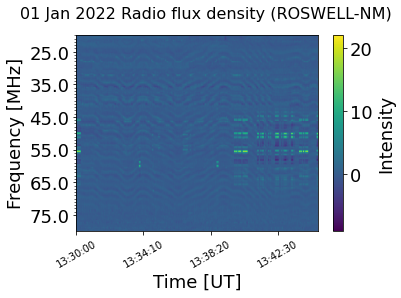

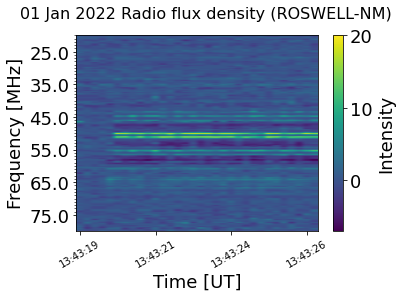

0.8560525312664443


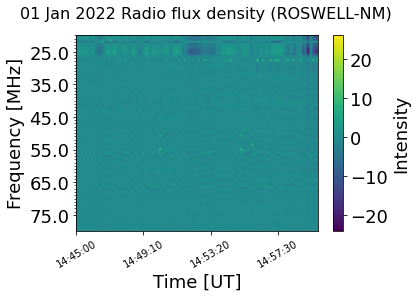

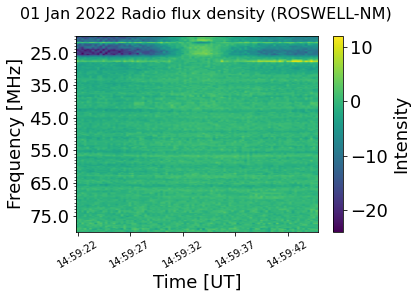

0.7043604780938572


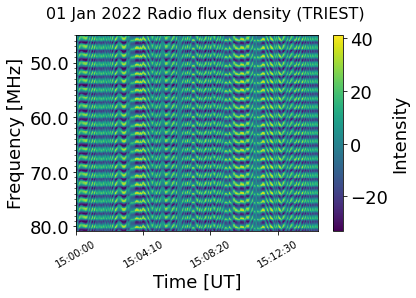

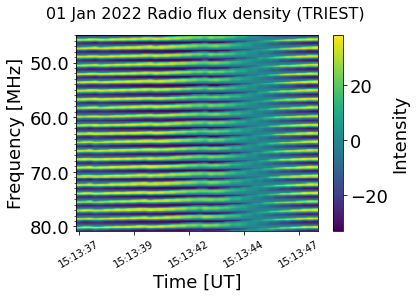

0.855775981675356


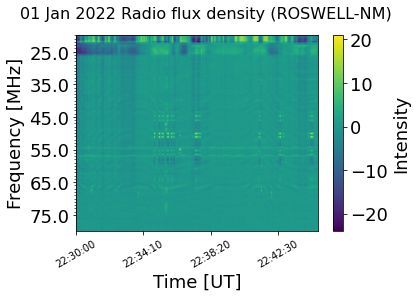

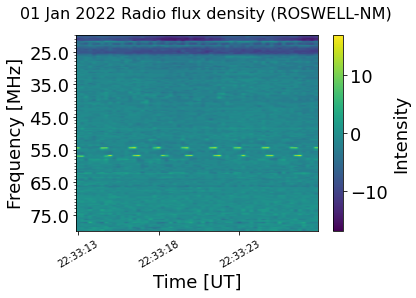

In [5]:
for i in jan[0]:
    if i.probability > 0.9:
        time = i.time_start
        print(i.probability)
        dpt = data.createFromTime(time.year, time.month ,time.day,str(time),i.stations[0],const.spectral_range)
        dpt.createSummedCurve([dpt.spectrum_data.freq_axis[-1], dpt.spectrum_data.freq_axis[0]])
        dpt.subtract_background()
        dpt.plot()

        del_start = int((i.time_start - dpt.spectrum_data.start - timedelta(seconds=(0))).total_seconds()*4)
        del_end = int((i.time_end - dpt.spectrum_data.start - timedelta(seconds=(0))).total_seconds()*4)
        dpt.spectrum_data.data = dpt.spectrum_data.data[:,del_start:del_end]
        dpt.spectrum_data.start = i.time_start
        dpt.plot()

In [8]:
l = reference.referenceMonstein2orMore(2022,1,13)
l

[['VI', 10:30:00, 10:39:00, '1.0000'], ['III', 11:33:00, 11:33:00, '1.0000'], ['III', 12:20:00, 12:24:00, '1.0000'], ['III', 12:46:00, 12:47:00, '1.0000'], ['VI', 12:57:00, 13:06:00, '1.0000'], ['III', 14:01:00, 14:01:00, '1.0000'], ['III', 17:09:00, 17:10:00, '1.0000']]

['VI', 10:30:00, 10:39:00, '1.0000']


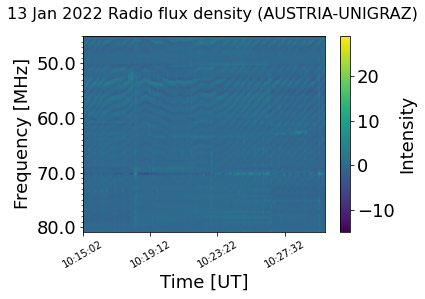

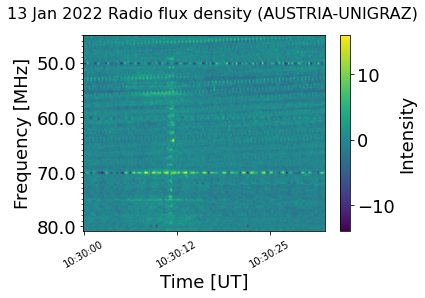

['III', 11:33:00, 11:33:00, '1.0000']


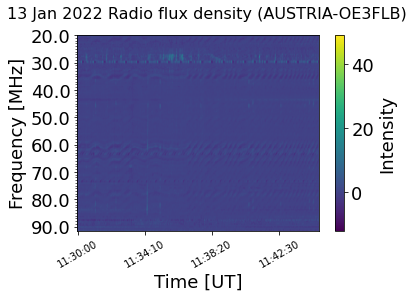

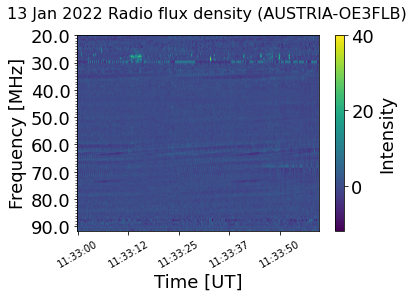

['III', 12:20:00, 12:24:00, '1.0000']


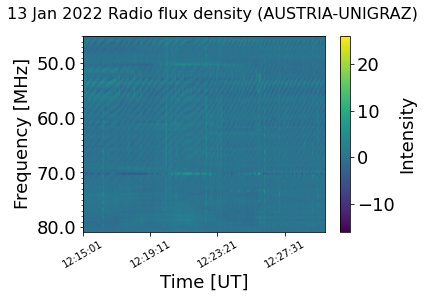

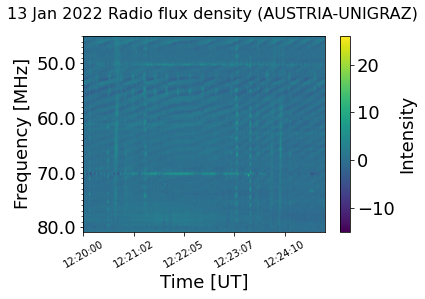

['III', 12:46:00, 12:47:00, '1.0000']


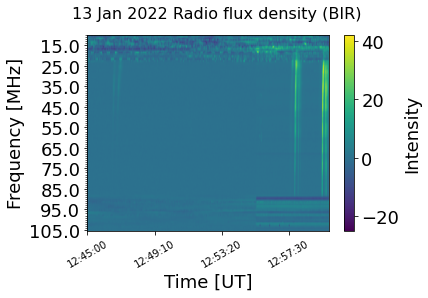

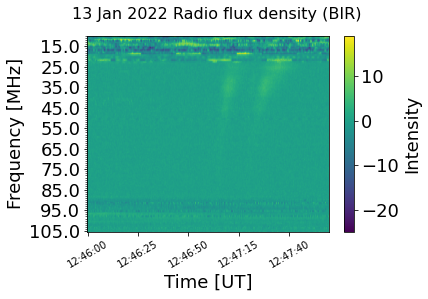

['VI', 12:57:00, 13:06:00, '1.0000']


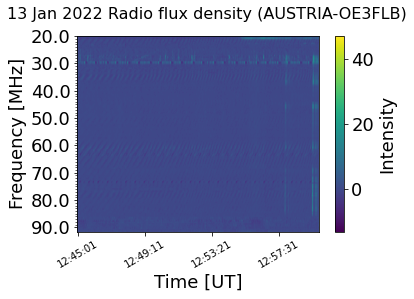

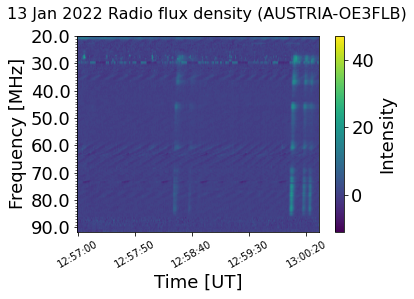

['III', 14:01:00, 14:01:00, '1.0000']


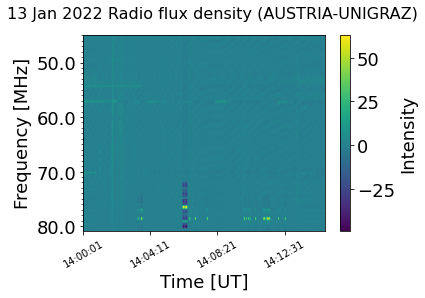

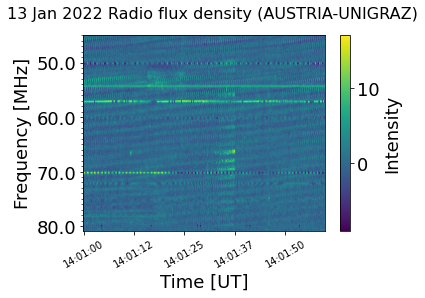

['III', 17:09:00, 17:10:00, '1.0000']


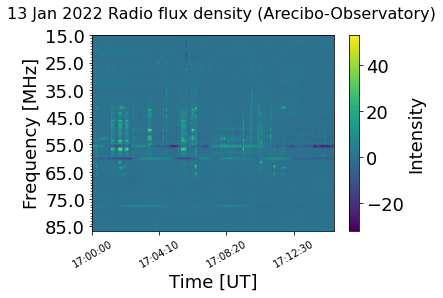

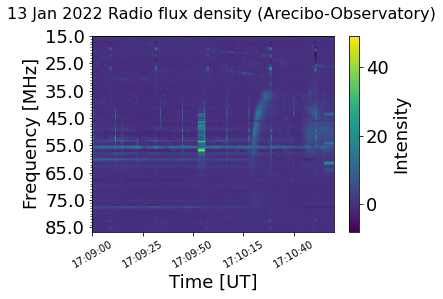

In [12]:
for i in l:

    time = i.time_start
    print(i)
    dpt = data.createFromTime(time.year, time.month ,time.day,str(time),i.stations[0],const.spectral_range)
    dpt.createSummedCurve([dpt.spectrum_data.freq_axis[-1], dpt.spectrum_data.freq_axis[0]])
    dpt.subtract_background()
    dpt.plot()
    del_start = int((i.time_start - dpt.spectrum_data.start - timedelta(seconds=(30))).total_seconds()*4)
    del_end = int((i.time_end - dpt.spectrum_data.start + timedelta(seconds=(30))).total_seconds()*4)
    dpt.spectrum_data.data = dpt.spectrum_data.data[:,del_start:del_end]
    dpt.spectrum_data.start = i.time_start
    dpt.plot()